# NLP ASSIGNMENT_2ND AUG - PART 2

Dispersion Plot for the top 15 words in the positive, negative and neutral sentiment

# DATA

In [1]:
import pandas as pd
import numpy as np
import os
os.chdir("G:/SEM 3 DATA SCIENCE/NLP")

In [2]:
data = pd.read_csv("May_2018.csv", encoding = 'ISO-8859-1')
data.head()

messageID    Message Source  \
0  fbc_1_201477243197783_2135802536431901_2139333...  Facebook Comment   
1  fbc_1_201477243197783_2135802536431901_2139333...  Facebook Comment   
2  fbc_1_201477243197783_2135802536431901_2139333...  Facebook Comment   
3  fbc_1_201477243197783_2135802536431901_2139333...  Facebook Comment   
4  fbc_1_201477243197783_2144082715603883_2147320...  Facebook Comment   

                                         Profile Pic  \
0  https://graph.facebook.com/174142006628152/pic...   
1  https://graph.facebook.com/174142006628152/pic...   
2  https://graph.facebook.com/174142006628152/pic...   
3  https://graph.facebook.com/174142006628152/pic...   
4  https://graph.facebook.com/1641033702681983/pi...   

                           Profile Link                  From Bio Title  \
0   http://facebook.com/174142006628152  Abhishek Ana Awasthi             
1   http://facebook.com/174142006628152  Abhishek Ana Awasthi             
2   http://facebook.com/174142006628152  Abhishek Ana Awasthi             
3   http://facebook.com/174142006628152  Abhishek Ana Awasthi             
4  http://facebook.com/1641033702681983       Roli Srivastava             

                                             Message Post Image Post Name  \
0  AGar mangaya hua sman tuta ya kharab nikla to ...                        
1  AGar mangaya hua sman tuta ya kharab nikla to ...                        
2  AGar mangaya hua sman tuta ya kharab nikla to ...                        
3  AGar mangaya hua sman tuta ya kharab nikla to ...                        
4                                                 Pp                        

          ...          Case Frt Case WH Frt Conversation Frt  \
0         ...                 0           0                0   
1         ...                 0           0                0   
2         ...           1730282     1730282              424   
3         ...           1730282     1730282              424   
4         ...                 0           0                0   

  Conversation WH Frt First Conversation Frt First Conversation WH Frt  \
0                   0                      0                         0   
1                   0                      0                         0   
2                 424                1730316                   1730316   
3                 424                1730316                   1730316   
4                   0                      0                         0   

  Holding Time Holding Time WH Currently Active           Updated On  
0          279             279               No  21-05-2018 11:37:37  
1           71              71               No  21-05-2018 11:38:48  
2            1               1               No  21-05-2018 11:38:48  
3            0               0              Yes  21-05-2018 11:38:49  
4           17              17               No  28-05-2018 16:29:52  

[5 rows x 78 columns]

# CLEANING DATA

In [3]:
df = data[["Message", "Sentiment", "Date"]]
df = df.dropna()
df = df[(df["Date"]!="###############################################################################################################################################################################################################################################################")]
df["Date"] = pd.to_datetime(df["Date"])
df = df.drop_duplicates(subset=["Message"], inplace=False)
df = df.reset_index(drop=True)

In [4]:
df.head()

Message Sentiment       Date
0  AGar mangaya hua sman tuta ya kharab nikla to ...   Neutral 2018-05-21
1                                                 Pp   Neutral 2018-05-28
2  I am sorry to inform you that after 9days you ...  Negative 2018-05-14
3    Today is Thursday again how. Many days you want   Neutral 2018-05-17
4  ???? ??? ???? ??? ? ??? ?? 104710797 ???? ??? ...   Neutral 2018-05-14

# PREPROCESSING DATA

In [5]:
from nltk.corpus import stopwords
from string import punctuation
stuff_to_be_removed = list(stopwords.words("english"))+list(punctuation)
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
import nltk
words = set(nltk.corpus.words.words())

In [18]:
# Corpus os the messages
corpus = df["Message"].tolist()

In [7]:
# Tokenizing, Lemmatizing and removing Stopwords and Punctuations from the messages
final_corpus= []
for i in range(len(corpus)):
    text = word_tokenize(corpus[i].lower())
    text = [t for t in text if len(t) > 2]
    text = [lemmatizer.lemmatize(y) for y in text if y not in stuff_to_be_removed]
    sent = " ".join(text)
    
    final_corpus.append(sent)

In [8]:
# Making a new clean dataframe
new_df = pd.DataFrame(final_corpus)
new_df["Sentiment"] = df["Sentiment"]
new_df["Date"] = df["Date"]
new_df.columns = ["Message", "Sentiment", "Date"]
new_df.head()

Message Sentiment       Date
0   agar mangaya hua sman tuta kharab nikla kya hoga   Neutral 2018-05-21
1                                                      Neutral 2018-05-28
2  sorry inform 9days n't give product within hr ...  Negative 2018-05-14
3                       today thursday many day want   Neutral 2018-05-17
4                                          104710797   Neutral 2018-05-14

# SPLITTING DATA: POSITIVE, NEGATIVE and NEUTRAL

In [9]:
df_pos = new_df[(df["Sentiment"]=="Positive")]
df_neg = new_df[(df["Sentiment"]=="Negative")]
df_neu = new_df[(df["Sentiment"]=="Neutral")]

In [10]:
# Function for sorting by date, removing duplicates and resetting index
def sort(df):
    df = df.sort_values(by='Date')
    df = df.drop_duplicates(subset=["Message"])
    df = df.reset_index(drop=True)
    return df

df_pos = sort(df_pos)
df_neg = sort(df_neg)
df_neu = sort(df_neu)
df_all = sort(new_df)

In [11]:
# Extracting top frequent 15 words in all dataframes
def top_words(df):
    top_N = 15
    a = df["Message"].str.lower().str.cat(sep=' ')
    words = nltk.tokenize.word_tokenize(a)
    word_dist = nltk.FreqDist(words)
    word_data = pd.DataFrame(word_dist.most_common(top_N),columns=['Word', 'Frequency'])
    
    return word_data["Word"]


positive = top_words(df_pos).values.tolist()
negative = top_words(df_neg).values.tolist()
neutral = top_words(df_neu).values.tolist() 

In [12]:
# Joining all rows to make a single string
def form_text(df):
    text = ' '.join(df["Message"])
    return text

postext = form_text(df_pos)
negtext = form_text(df_neg)
neutext = form_text(df_neu)
alltext = form_text(df_all)

In [13]:
# Converting the strings to a NLTK Test
def convert_text(text):
    tokens = nltk.word_tokenize(text)
    final_text = nltk.Text(tokens)
    
    return final_text

pos_text = convert_text(postext)
neg_text = convert_text(negtext)
neu_text = convert_text(neutext)
all_text = convert_text(alltext)

# DISPERSION PLOTS

In [14]:
# Function to make a dispersion plot
import nltk
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

def dispersion(text, words):
    points = [(x, y) for x in range(len(text))
          for y in range(len(words)) if text[x] == words[y]]
 
    if points:
        x, y = zip(*points)
    else:
        x = y = ()
 
    plt.plot(x, y, "rx", scalex=.1, color="green")
    plt.yticks(range(len(words)), words, color="black")
    plt.ylim(-1, len(words))
    plt.title("Lexical Dispersion Plot")
    plt.xlabel("Word Offset")
    plt.show() 

DISPERSION PLOT FOR POSITIVE SENTIMENT

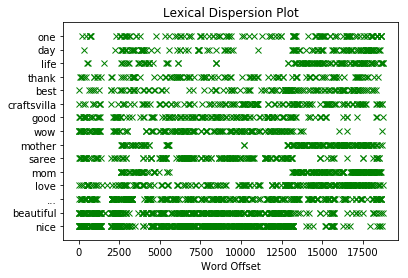

In [15]:
dispersion(pos_text, positive)

DISPERSION PLOT FOR NEGATIVE SENTIMENT

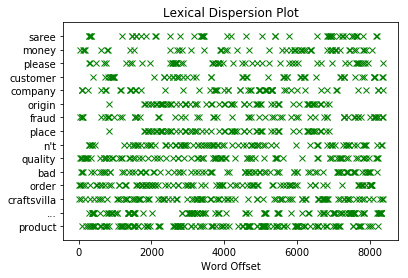

In [16]:
dispersion(neg_text, negative)

DISPERSION PLOT FOR NEUTRAL SENTIMENT

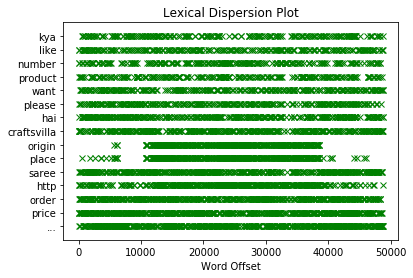

In [17]:
dispersion(neu_text, neutral)